In [1]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 26.6 MB/s eta 0:00:00


In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

In [8]:
suppl_ChemBL34 = Chem.SDMolSupplier("minimized_ChemBL34.sdf")
suppl_ChemDiv = Chem.SDMolSupplier("minimized_ChemDiv.sdf")
suppl_ChemSpace = Chem.SDMolSupplier("minimized_ChemSpace.sdf")

In [13]:
for i, mol in enumerate(suppl_ChemBL34):
    if i == 5:
        break
    print(Chem.MolToSmiles(mol))

Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1C#Cc1cnc2cccnn12
Cc1cccc(Nc2nc3cc(Oc4ncnc5c4cnn5C)ccc3n2C)c1
Cc1cn(-c2ccc3nc(-c4ccc(C)c(C#Cc5cnc6cccnn56)c4)[nH]c3c2)cn1
Cc1ccc(C(=O)NC2CCCC2)cc1C#Cc1cnc2ccnn2c1
NS(=O)(=O)c1cc(C(=O)Nn2cnc3ccccc32)c(Cl)cc1Cl


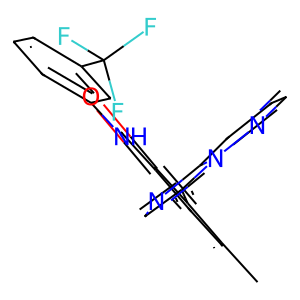

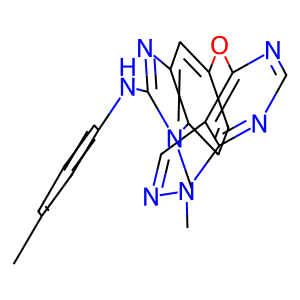

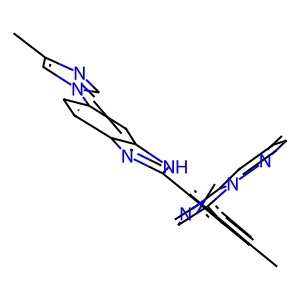

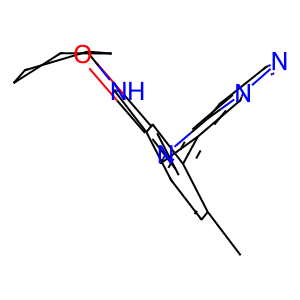

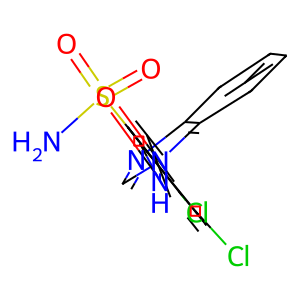

In [16]:
for i, mol in enumerate(suppl_ChemBL34):
    if i == 5:
        break
    display(Draw.MolToImage(mol))

In [26]:
chemBL34 = []
chemDiv = []
chemSpace = []

for suppl, data in zip([suppl_ChemBL34, suppl_ChemDiv, suppl_ChemSpace], [chemBL34, chemDiv, chemSpace]):
    for mol in suppl:
        props = {prop: mol.GetProp(prop) for prop in mol.GetPropNames()}  # Extract properties
        props["SMILES"] = Chem.MolToSmiles(mol)  # Add SMILES
        props["n_atoms"] = mol.GetNumAtoms()
        data.append(props)

df_chemBL34 = pd.DataFrame(chemBL34)
df_chemDiv = pd.DataFrame(chemDiv)
df_chemSpace = pd.DataFrame(chemSpace)

In [27]:
df_chemBL34.head()

,minimizedAffinity,minimizedRMSD,SMILES,n_atoms
0,-12.39303,0.50603,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1C#Cc1cnc2cc...,31
1,33.18160,0.50850,Cc1cccc(Nc2nc3cc(Oc4ncnc5c4cnn5C)ccc3n2C)c1,29
2,-12.70531,0.55382,Cc1cn(-c2ccc3nc(-c4ccc(C)c(C#Cc5cnc6cccnn56)c4...,33
3,-11.23394,0.55524,Cc1ccc(C(=O)NC2CCCC2)cc1C#Cc1cnc2ccnn2c1,26
4,-4.50514,0.55983,NS(=O)(=O)c1cc(C(=O)Nn2cnc3ccccc32)c(Cl)cc1Cl,24


In [28]:
df_chemDiv.head()

,minimizedAffinity,minimizedRMSD,SMILES,n_atoms
0,-11.47568,1.63185,COc1cccc(NC(=O)CCCc2nc(-c3cc4ccc(C)cc4nc3O)no2)c1,31
1,-11.28093,1.63104,Cc1ccc2cc(-c3noc(CCCC(=O)N[C@@H](C)c4ccccc4)n3...,31
2,-11.10828,1.27349,Cc1ccc2cc(-c3noc(CCCC(=O)Nc4ccccc4)n3)c(O)nc2c1,29
3,-11.03508,1.33853,Cc1ccc2cc(-c3noc(CCCC(=O)NCc4ccco4)n3)c(O)nc2c1,29
4,-10.81172,1.02718,Cc1ccc2cc(-c3noc(CCCC(=O)Nc4nc(C)cs4)n3)c(O)nc2c1,29


In [29]:
df_chemSpace.head()

,minimizedAffinity,minimizedRMSD,SMILES,n_atoms
0,-11.22524,0.65944,O=C(Nc1nnc2ccccn12)[C@H]1CCCN(C(=O)Nc2ccccc2)C1,27
1,-10.56029,2.20898,O=C(CCCCCn1cnc2ccccc2c1=O)Nc1ccc2c(c1)C(=O)N1C...,35
2,-10.48171,1.11566,Cc1ccc2cc(COC(=O)c3ccc(NC(N)=O)cc3)c(Cl)nc2c1,26
3,-10.45785,1.45411,C[C@H](NC(=O)c1cncc(C(=O)N[C@@H](C)c2nc3ccccc3...,34
4,-10.31438,1.13147,CN(C)CC(=O)Nc1cccc(CNc2cnc3ccccc3n2)c1,25
